# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 158MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_Occupation/

## Import Libraries

In [2]:
import tensorflow as tf
import keras
from keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
TRAIN_PATH = '/content/ParkingLot_Occupation/train'
TEST_PATH = '/content/ParkingLot_Occupation/test'

batch_size = 32
img_height = 64
img_width = 64

# Load Training Data
train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=0.15,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_PATH,
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1382 files belonging to 2 classes.
Using 1175 files for training.
Found 1382 files belonging to 2 classes.
Using 207 files for validation.


In [4]:
# Load Test Data
test_ds = tf.keras.utils.image_dataset_from_directory(
  TEST_PATH,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 344 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['empty', 'occupied']


Define Normalization and Resizing Step

In [6]:
IMG_SIZE = 64

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

Define Augmentation Step

In [7]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

Visualize augmentation

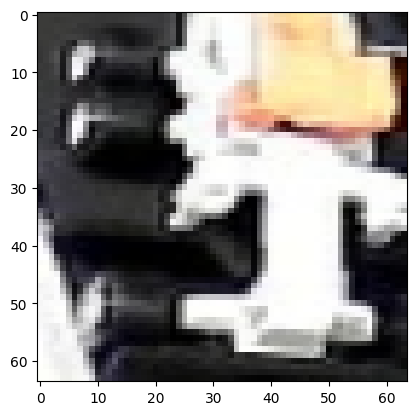

In [14]:
image, label = next(iter(train_ds))
_ = plt.imshow(image[0].numpy().astype("uint8"))

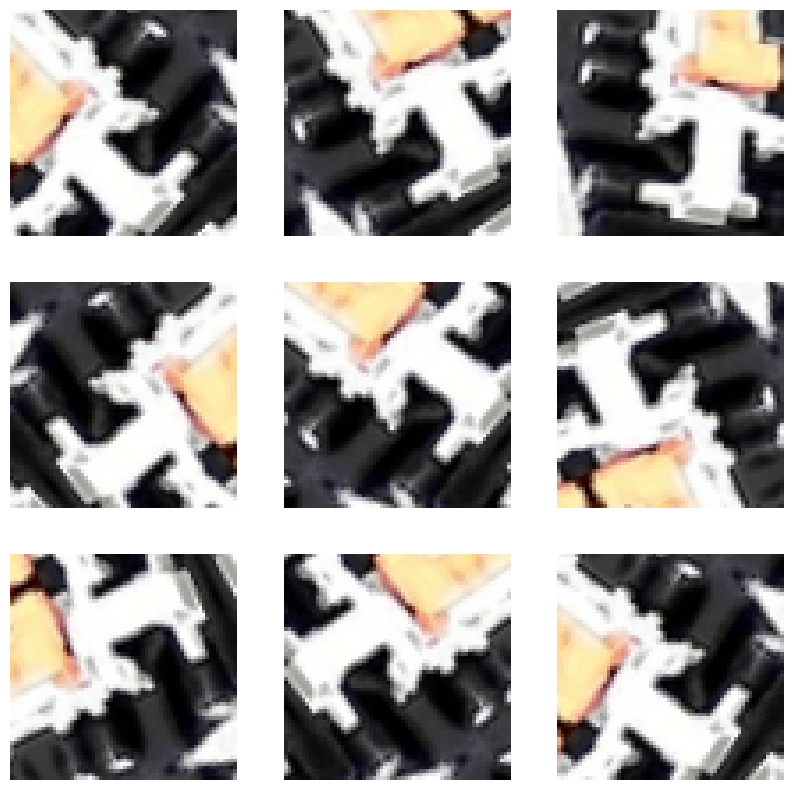

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [ ]:
# Data Already splitted Above

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [16]:
model = Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(20, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 64, 64, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [19]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.5224 - loss: 0.8424 - val_accuracy: 0.7971 - val_loss: 0.5234
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.7537 - loss: 0.5008 - val_accuracy: 0.9420 - val_loss: 0.4431
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.8862 - loss: 0.4380 - val_accuracy: 0.9372 - val_loss: 0.4186
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9366 - loss: 0.4048 - val_accuracy: 0.9565 - val_loss: 0.3999
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9674 - loss: 0.3923 - val_accuracy: 0.9324 - val_loss: 0.3916
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9569 - loss: 0.3620 - val_accuracy: 0.9565 - val_loss: 0.3789
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9686 - loss: 0.3639 - val_accuracy: 0.9469 - val_loss: 0.3671
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.9553 - loss: 0.3595 - val_accuracy: 0.9517 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [45]:
model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9593 - loss: 0.3281


[0.3281802833080292, 0.9505813717842102]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [ ]:
#!kaggle datasets download -d khaledzsa/parkinglot-occupation
#!unzip parkinglot-occupation.zip

In [44]:
img_PATH_occupied = '/content/ParkingLot_Occupation/train/occupied/roi_011b0fd3c670409bbf180810a0b02829_occupied.jpg'
img_PATH_empty = '/content/ParkingLot_Occupation/test/empty/roi_07f6578b514e4b54a135f81c04571fc4_empty.jpg'



# Load Occupied test image
img_occ = tf.keras.utils.load_img(
     img_PATH_occupied, target_size=(img_height, img_width))
img_array_occ = tf.keras.utils.img_to_array(img_occ)
img_array_occ = tf.expand_dims(img_array_occ, 0)

# Load empty test image
img_emp = tf.keras.utils.load_img(
     img_PATH_empty, target_size=(img_height, img_width))
img_array_emp = tf.keras.utils.img_to_array(img_emp)
img_array_emp = tf.expand_dims(img_array_emp, 0)


predictions_occ = model.predict(img_array_occ)
score_occ = tf.nn.softmax(predictions_occ[0])

predictions_emp = model.predict(img_array_emp)
score_emp = tf.nn.softmax(predictions_emp[0])

print(
    "This 1st image most likely belongs to {} "
    .format(class_names[np.argmax(score_occ)])
)

print(
    "This 2st image most likely belongs to {}"
    .format(class_names[np.argmax(score_emp)])
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This 1st image most likely belongs to empty 
This 2st image most likely belongs to empty


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

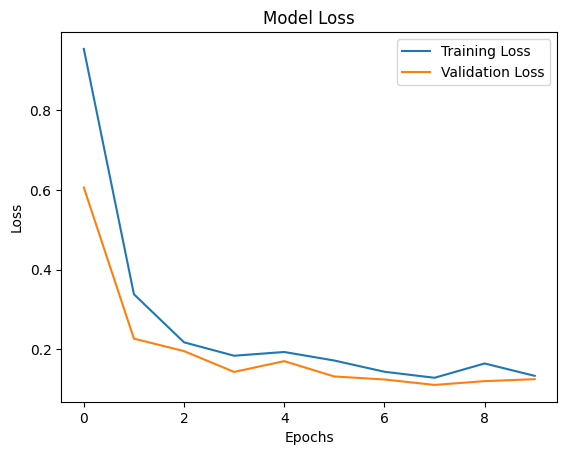

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


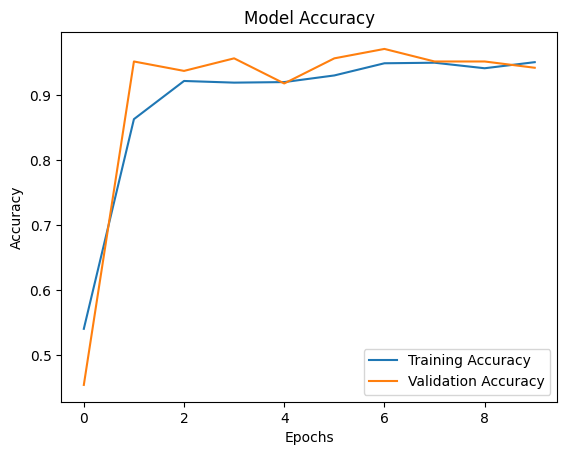

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('model.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

- In the data preprocessing step: I resized and normalized images to standardize the image input and give the CNN digestable data size and format, so it can improve its performance.

- Bulidnig the model architecture I started with building many convulotional an dense layers, but then realized that I should start with simpler approach. First, I put the resizing, rescaling and augmentation layers. Then, a single convolutional layer with a pooling layer.
Finally, comes a flatten layer, a single dense layer with Relu activation and an output layer. The output layer outputs two outputs similar to the number of classes we have with the use of softmax activation. Due to the simplicity of the data, building a simple model is chosen.

- SparseCategoricalCrossentropy chosen because we have a multi class with two labels empty or occupied with 10 epoch reached a reasonable accuracy for the training and validation without overfitting nor underfitting


- I have not faced any overfitting nor underfitting to use normalization techniques or increase the complexity of the model. I just reduced the numbers of layers which worked very good on the model's performance


- I used accuracy and tested the model on test dataset which generated a high accuracy. Moreover, I plotted loss and accuracy to visualized the performance of the model with each epoch. Recall and percesion could've been used but had no time to implement them.


- At first my model performed so well with many layers but obviosly was overfitting. I reduced the model's complexity by using less layers which eventually mitigated overfitting. In case of underfitting, increasing the model complexity by increasing layers and neurons could be an option.